In [1]:
# importing all the neccessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras as K
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from IPython.display import clear_output

Using TensorFlow backend.


In [2]:
# loading the data into data frame
df = pd.read_csv('E:\pathrise\listings.csv')
df.head()

C:\Users\akhil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


<h3>Cleaning the dataset</h3> 

In [3]:

#cleaning the price values and removing unneccessary symbols
df['price']= df['price'].str.replace('$','')
df['weekly_price']=df['weekly_price'].str.replace('$','')
df['monthly_price']= df['monthly_price'].str.replace('$','')
df['security_deposit']=df['security_deposit'].str.replace('$','')
df['cleaning_fee']= df['cleaning_fee'].str.replace('$','')
df['extra_people']=df['extra_people'].str.replace('$','')
df['price']= df['price'].str.replace(',','')
df['weekly_price']=df['weekly_price'].str.replace(',','')
df['monthly_price']= df['monthly_price'].str.replace(',','')
df['security_deposit']=df['security_deposit'].str.replace(',','')
df['cleaning_fee']= df['cleaning_fee'].str.replace(',','')
df['extra_people']=df['extra_people'].str.replace(',','')


df['price']= df['price'].astype(float)
df['weekly_price']= df['weekly_price'].astype(float)
df['monthly_price']= df['monthly_price'].astype(float)
df['security_deposit']= df['security_deposit'].astype(float)
df['cleaning_fee']= df['cleaning_fee'].astype(float)
df['extra_people']= df['extra_people'].astype(float)

#replacing null values with 0 in the below fields
df['security_deposit'] = df['security_deposit'].replace(np.nan, 0)
df['cleaning_fee'] = df['cleaning_fee'].replace(np.nan, 0)

##############################################################################


#replacing true or false values with 1s and 0s respectively
df['instant_bookable']=np.where(df['instant_bookable'].str.contains('t'), 1, 0)
df['is_business_travel_ready']=np.where(df['is_business_travel_ready'].str.contains('t'), 1, 0)
df['host_is_superhost']=np.where(df['host_is_superhost'].str.contains('t'), 1, 0)
df['host_has_profile_pic']=np.where(df['host_has_profile_pic'].str.contains('t'), 1, 0)
df['host_identity_verified']=np.where(df['host_identity_verified'].str.contains('t'), 1, 0)
df['is_location_exact']=np.where(df['is_location_exact'].str.contains('t'), 1, 0)
df['has_availability']=np.where(df['has_availability'].str.contains('t'), 1, 0)
df['requires_license']=np.where(df['requires_license'].str.contains('t'), 1, 0)
df['require_guest_profile_picture']=np.where(df['require_guest_profile_picture'].str.contains('t'), 1, 0)
df['require_guest_phone_verification']=np.where(df['require_guest_phone_verification'].str.contains('t'), 1, 0)

##########################################

#verifying the above cell operations
df[['instant_bookable','is_business_travel_ready','host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','require_guest_profile_picture','require_guest_phone_verification']].head()

########################################################

#counting the number of amenities provided for a listing
df['amenities_count'] = df['amenities'].str.count(',')

#replacing the null values in reviews per month with 0s
df['reviews_per_month'] = df['reviews_per_month'].replace(np.nan, 0)

####################################################################

#creating dummy values for neighbourhood_cleansed and concatenating it to the main dataframe
dum = pd.get_dummies(df['neighbourhood_cleansed'], prefix ='neigh')
dumm1 = pd.get_dummies(df['property_type'], prefix='property')
dumm2 = pd.get_dummies(df['room_type'],prefix ='room')
dumm3 = pd.get_dummies(df['cancellation_policy'], prefix='cancel')
df = pd.concat([df, dum], axis = 1)
df = pd.concat([df, dumm1], axis = 1)
df = pd.concat([df, dumm2], axis = 1)
df = pd.concat([df, dumm3], axis = 1)

####################################################################

In [4]:
# checking whether the data is free from null values
print(df.isnull().sum().to_string())

print(df.shape)

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               35
summary                                           629
space                                            5422
description                                       219
experiences_offered                                 0
neighborhood_overview                            6584
notes                                           11523
transit                                          6302
access                                           8468
interaction                                      7988
house_rules                                      7883
thumbnail_url                                   20677
medium_url                                      20677
picture_url                                         0
xl_picture_url              

In [5]:
# Removing text type columns
waste_col_list = []
for i in range(df.shape[1]):
    # removing null values
    if df.isnull().sum().values[i] >= 18086:
        print(i, df.columns[i])
        waste_col_list.append(df.columns[i])
        
    # removing string/object types for regression
    if type(df.iloc[0, i]) == str:
        print(i, df.columns[i])
        waste_col_list.append(df.columns[i])
    if df.dtypes.values[i] == object:
        print(i, df.columns[i])
        waste_col_list.append(df.columns[i])
        
    # removing usless categorical features
    if df.iloc[:, i].unique().shape <= (1,):
        print(i, df.columns[i])
        waste_col_list.append(df.columns[i])

print(waste_col_list)
df_new = df.drop(waste_col_list, axis=1)
df_new.head()

1 listing_url
1 listing_url
2 scrape_id
3 last_scraped
3 last_scraped
4 name
4 name
5 summary
5 summary
6 space
6 space
7 description
7 description
8 experiences_offered
8 experiences_offered
8 experiences_offered
9 neighborhood_overview
9 neighborhood_overview
10 notes
10 notes
11 transit
11 transit
12 access
13 interaction
14 house_rules
14 house_rules
15 thumbnail_url
15 thumbnail_url
16 medium_url
16 medium_url
17 picture_url
17 picture_url
18 xl_picture_url
18 xl_picture_url
20 host_url
20 host_url
21 host_name
21 host_name
22 host_since
22 host_since
23 host_location
23 host_location
24 host_about
24 host_about
25 host_response_time
25 host_response_time
26 host_response_rate
26 host_response_rate
27 host_acceptance_rate
27 host_acceptance_rate
29 host_thumbnail_url
29 host_thumbnail_url
30 host_picture_url
30 host_picture_url
31 host_neighbourhood
31 host_neighbourhood
34 host_verifications
34 host_verifications
37 street
37 street
38 neighbourhood
38 neighbourhood
39 neighbourh

,id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,...,property_Villa,property_Yurt,room_Entire home/apt,room_Private room,room_Shared room,cancel_flexible,cancel_moderate,cancel_strict_14_with_grace_period,cancel_super_strict_30,cancel_super_strict_60
0,2818,3159,1,1.0,1.0,1,0,52.36575,4.94142,0,...,0,0,0,1,0,0,0,1,0,0
1,20168,59484,0,2.0,2.0,1,0,52.36509,4.89354,1,...,0,0,0,1,0,0,0,1,0,0
2,25428,56142,0,2.0,2.0,1,0,52.37297,4.88339,0,...,0,0,1,0,0,0,0,1,0,0
3,27886,97647,1,1.0,1.0,1,1,52.38673,4.89208,1,...,0,0,0,1,0,0,0,1,0,0
4,28871,124245,1,3.0,3.0,1,1,52.36719,4.89092,1,...,0,0,0,1,0,0,1,0,0,0


In [6]:
#Printing the data types of all the columns
print(df_new.dtypes.to_string())

id                                                int64
host_id                                           int64
host_is_superhost                                 int32
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                              int32
host_identity_verified                            int32
latitude                                        float64
longitude                                       float64
is_location_exact                                 int32
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
security_deposit                                float64
cleaning_fee                                    float64
guests_included                                 

In [7]:
# Filling the Nan values using ffill method
df_new = df_new.ffill(axis = 0)
print(df_new.shape)

df_new = df_new.dropna()
print(df_new.shape)

print(df_new.isnull().sum().to_string())

(20677, 114)
(20677, 114)
id                                              0
host_id                                         0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
latitude                                        0
longitude                                       0
is_location_exact                               0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0
minimum_nights          

In [9]:
# Splitting the data into train, validate and test datasets
train, validate, test = np.split(df_new['price'].sample(frac=1), [int(.7*len(df)), int(.8*len(df))])
print(train.shape, test.shape, validate.shape)

(14473,) (4136,) (2068,)


In [10]:
# fuction for plotting the loss function while training the model
class PlotLosses(K.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

<h3>Autoencoder Neural Network Structure </h3>
<img src="https://miro.medium.com/max/3148/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png">

<h3>Building the model</h3>

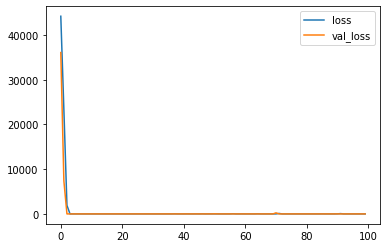

In [11]:
model = Sequential()
input_img = Input(shape=(1,))
# neural network structure
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1)(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
opt = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.99)
autoencoder.compile(optimizer= opt,  loss='mean_squared_error')

early_stop = K.callbacks.EarlyStopping(monitor='val_loss', patience=50)# using callback function to control the compute time if there is no significant learning done from previous Epoch

autoencoder.fit(train, train,
                epochs=100,
                batch_size=1024,
                shuffle=True,
                validation_data=(test, test),
                callbacks=[early_stop, plot_losses])

<h3>Model Evaluation</h3>

(2068,)
(2068, 1)


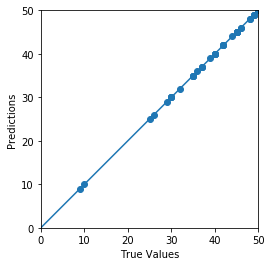

In [12]:
# Plotting the predicted and test values to check the model fit.
real_test = validate.to_numpy()
print(real_test.shape)

predict_ = autoencoder.predict(real_test)
print(predict_.shape)

a = plt.axes(aspect='equal')
plt.scatter(real_test.flatten(), predict_.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

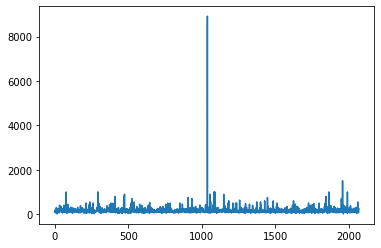

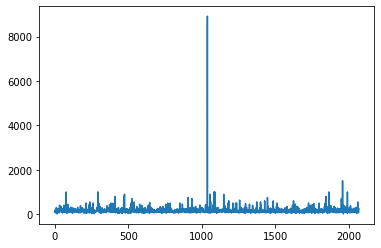

In [13]:
# Model similarity between real and predicted values.
plt.plot(real_test.flatten())
plt.show()
plt.plot(predict_.flatten())
plt.show()

In [17]:
# calculating the metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("MSE: ", mean_squared_error(real_test.flatten(), predict_.flatten()))
print("R2 score:" , r2_score(real_test.flatten(), predict_.flatten()))
print("MAE:" , mean_absolute_error(real_test.flatten(), predict_.flatten()))

MSE:  0.00013179147743013246
R2 score: 0.999999997310406
MAE: 0.00402919466767597


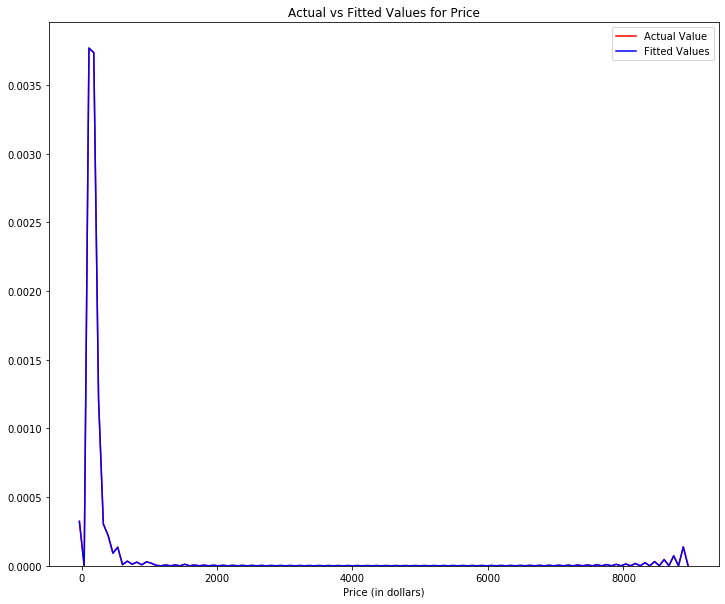

In [18]:
# Dist plot to check the model accuracy
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(real_test, hist=False, color="r", label="Actual Value")
sns.distplot(predict_, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')

plt.show()

We can see from the above distribution plot the predicted model and the actual model are very similar.

From the above results we can see that the autoencoder neural network model has high accuracy and very low error.